In [ ]:
%pip install -q pandas matplotlib scipy
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ticks_million = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
ticks_comma = ticker.StrMethodFormatter('{x:,.0f}')

pd.options.display.max_rows = 999

COLOR_GO=(74/255, 171/255, 211/255)
COLOR_RUST=(229/255,89/255,40/255)
COLOR_UNSAFE=(132/255,41/255,35/255)

BAR_COLORS=[COLOR_GO,COLOR_RUST,COLOR_UNSAFE]

comp = pd.read_csv('bbolt_comp.csv')

In [ ]:
comp.head()

,runtime,write_alg,read_alg,count,batch,write_ops/s,read_ops/s
0,release,seq,seq,100000,5000,94082,52631578
1,release,seq,seq,100000,5000,91091,55555555
2,release,seq,seq,100000,5000,92609,55555555
3,release,seq,seq,100000,5000,92988,55555555
4,release,seq,seq,100000,5000,93214,58823529


In [ ]:
runtimes = comp[comp.runtime.isin(["release","go","unsafe"])]

c100k = runtimes[runtimes['count']==100000]
c1m = runtimes[runtimes['count']==1000000]

In [ ]:
c100k.groupby(["write_alg","runtime","batch"])["write_ops/s"].mean()

write_alg  runtime  batch 
rnd        go       5000       60730.2
                    10000     104255.8
                    25000      96866.8
                    50000      25835.3
                    100000      5951.0
           release  5000       65438.0
                    10000     112470.6
                    25000     124230.4
                    50000      56547.0
                    100000     16112.5
           unsafe   5000       65642.2
                    10000     113388.3
                    25000     125212.1
                    50000      56418.1
                    100000     16141.0
rnd-nest   go       5000       78479.9
                    10000      88638.4
                    25000      39786.5
                    50000      13784.5
                    100000      6077.7
           release  5000       79413.5
                    10000      92049.6
                    25000      56729.1
                    50000      30903.1
                    100000     16213.

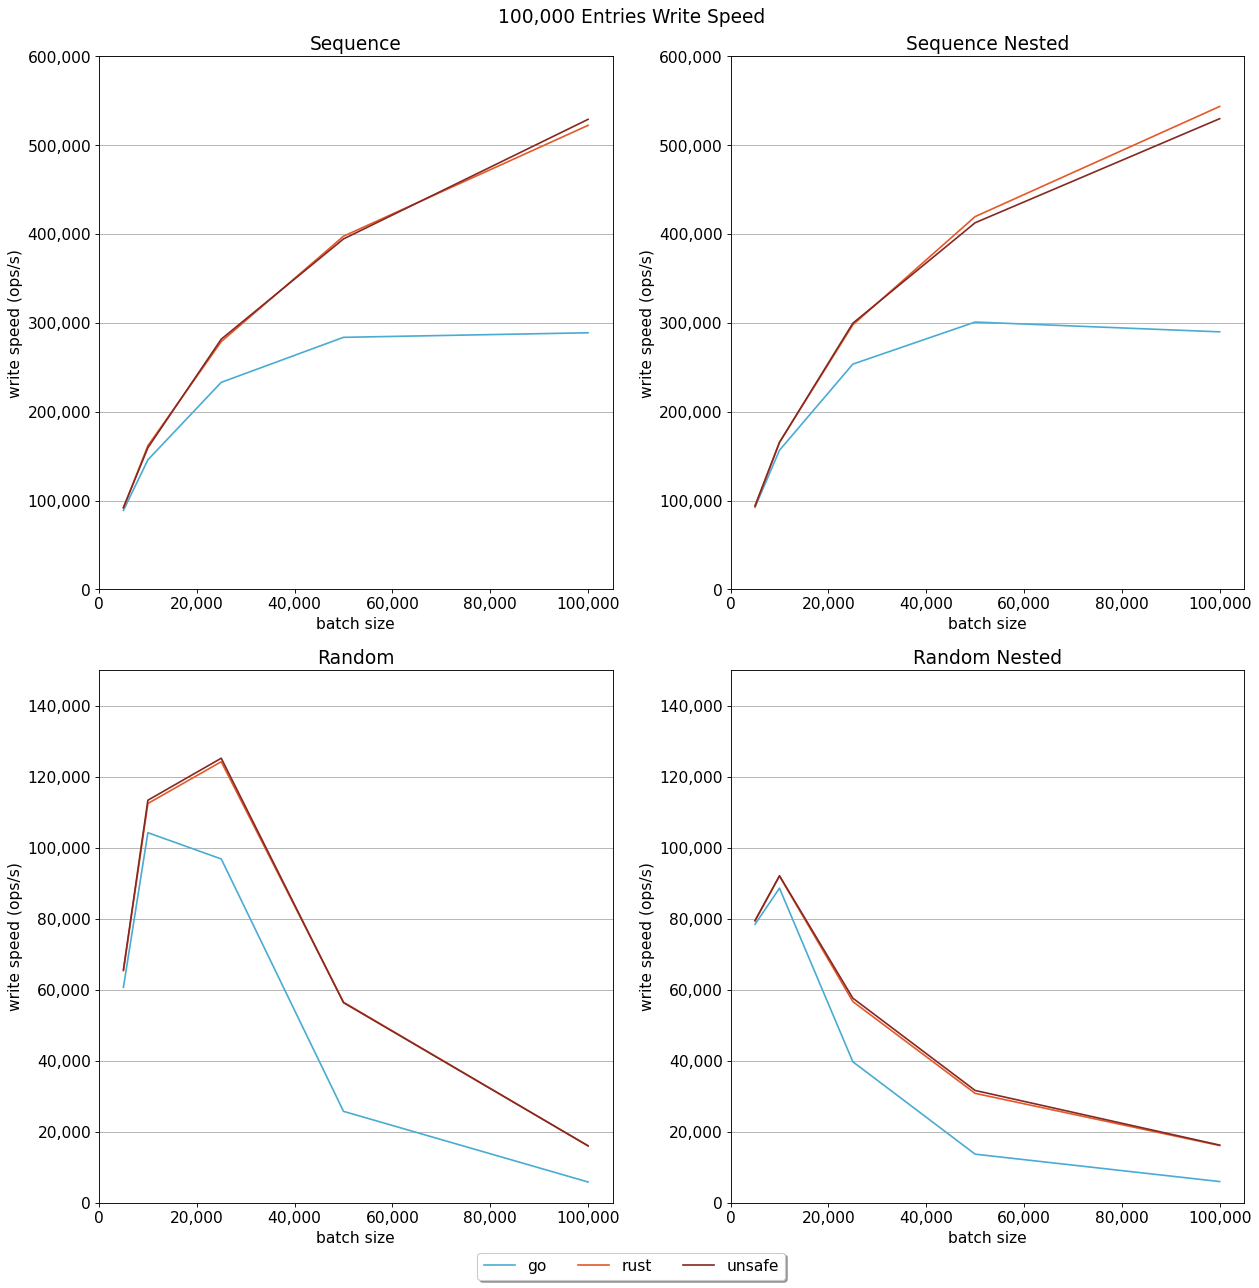

In [ ]:
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('100,000 Entries Write Speed')
ax = fig.add_subplot(221)
grouped=c100k[c100k['write_alg']=='seq'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Sequence')
ax.grid(axis='y')
ax.set_ylim([0,600000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(222)
grouped=c100k[c100k['write_alg']=='seq-nest'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Sequence Nested')
ax.grid(axis='y')
ax.set_ylim([0,600000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(223)
grouped=c100k[c100k['write_alg']=='rnd'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Random')
ax.grid(axis='y')
ax.set_ylim([0,150000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(224)
grouped=c100k[c100k['write_alg']=='rnd-nest'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Random Nested')
ax.grid(axis='y')
ax.set_ylim([0,150000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax.xaxis.set_major_formatter(ticks_comma)
fig.tight_layout()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines, labels,loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=True, shadow=True, ncols=3)
plt.show()

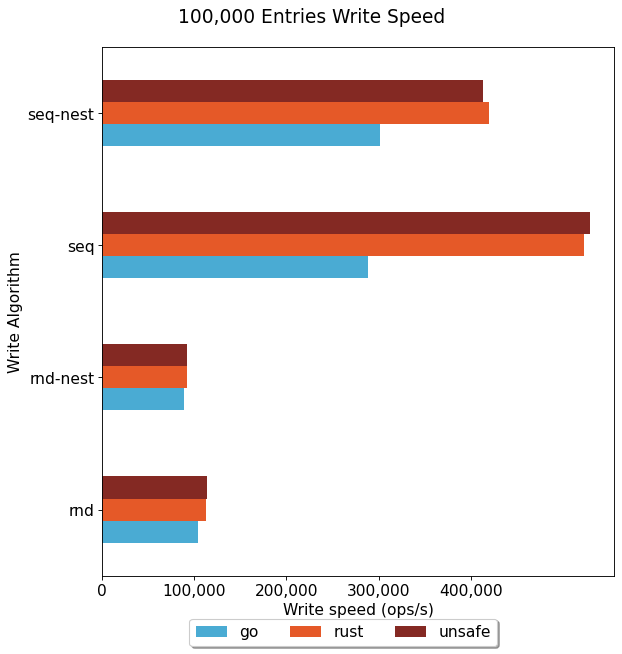

In [ ]:
alg = list()
batch_size = list()
release = list()
go = list()
unsafe = list()

for write_alg in set(c100k['write_alg']):
    g=c100k[c100k['write_alg']==write_alg].groupby(["runtime","batch"])["write_ops/s"].mean()
    maxed=g['go'].idxmax()
    alg.append(write_alg)
    batch_size.append(maxed)
    release.append(g['release'][maxed])
    go.append(g['go'][maxed])
    unsafe.append(g['unsafe'][maxed])

d = {
    'write_alg': alg,
    'go': go,
    'rust': release,
    'unsafe': unsafe
}

df=pd.DataFrame(data=d)
df.sort_values('write_alg',inplace=True)
fig = plt.figure(figsize=(8,8), dpi=80)
fig.suptitle('100,000 Entries Write Speed')
ax = fig.add_subplot(111)
df.plot.barh(x='write_alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlabel('Write speed (ops/s)')
ax.set_xticks([0,100000,200000,300000,400000])
ax.set_ylabel('Write Algorithm')
ax.get_legend().remove()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.55, -0.03), fancybox=True, shadow=True, ncols=3)
fig.tight_layout()
plt.show()

In [ ]:
d = pd.DataFrame()

for write_alg in set(c100k['write_alg']):
    g=c100k[c100k['write_alg']==write_alg].groupby(["runtime","batch"])["write_ops/s"].mean()
    dr = pd.DataFrame()
    maxed=g['go'].idxmax()
    s = pd.Series([g['release'][maxed],g['go'][maxed]], index=['release','go'])
    dr[write_alg]=s   
    print(write_alg)
    print(s['release']/s['go'])
    print(dr)
    print('\n')

rnd
1.0787946569879086
              rnd
release  112470.6
go       104255.8


rnd-nest
1.0384844491777832
         rnd-nest
release   92049.6
go        88638.4


seq-nest
1.39438885891449
         seq-nest
release  419707.7
go       300997.6


seq
1.8081065384889603
              seq
release  522420.2
go       288932.2




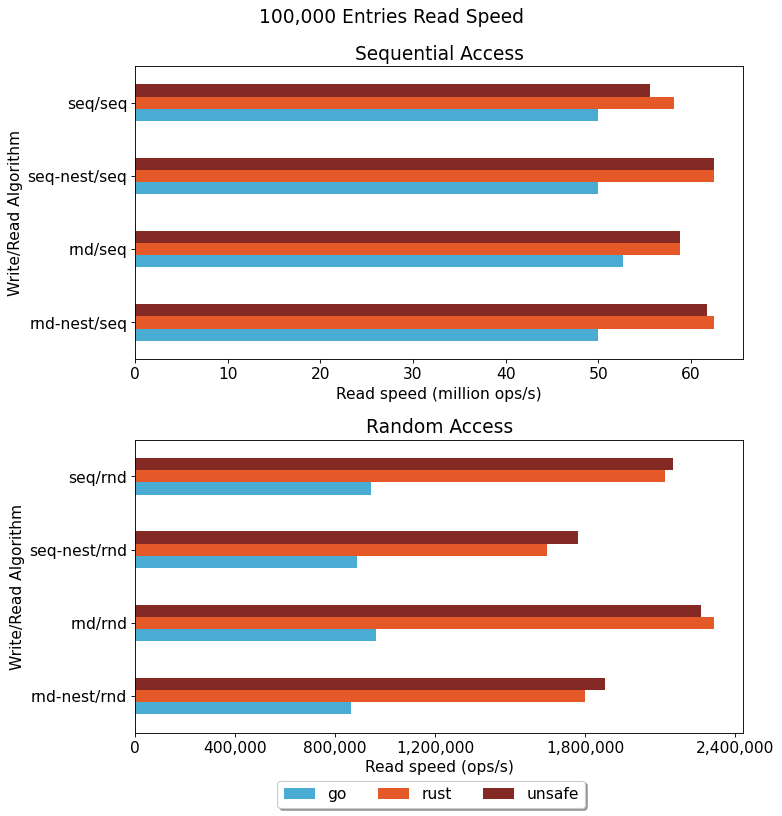

In [ ]:
alg = list()
batch_size = list()
release = list()
go = list()
unsafe = list()

for write_alg in set(c100k['write_alg']):
    for read_alg in set(c100k['read_alg']):
        g=c100k[c100k['write_alg']==write_alg].groupby(["read_alg","runtime","batch"])["read_ops/s"].mean()
        r = maxed=g[read_alg]
        maxed=r['go'].idxmax()
        alg.append(write_alg + '/' + read_alg)
        batch_size.append(maxed)
        release.append(r['release'][maxed])
        go.append(r['go'][maxed])
        unsafe.append(r['unsafe'][maxed])

d = {
    'alg': alg,
    'go': go,
    'rust': release,
    'unsafe': unsafe
}
pd_rnd=pd.DataFrame(data=d)
pd_rnd.sort_values('alg',inplace=True)
fig = plt.figure(figsize=(10,10), dpi=80)
fig.suptitle('100,000 Entries Read Speed')
ax = fig.add_subplot(212)
pd_rnd[pd_rnd['alg'].str.endswith('rnd')].plot(kind='barh',x='alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_title('Random Access')
ax.set_xlabel('Read speed (ops/s)')
ax.set_xticks([0,400000,800000,1200000,1800000,2400000])
ax.set_ylabel('Write/Read Algorithm')
ax.get_legend().remove()
ax = fig.add_subplot(211)
pd_rnd[pd_rnd['alg'].str.endswith('seq')].plot(kind='barh',x='alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_million)
ax.set_title('Sequential Access')
ax.set_xlabel('Read speed (million ops/s)')
ax.set_ylabel('Write/Read Algorithm')
ax.get_legend().remove()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.55, -0.03), fancybox=True, shadow=True, ncols=3)
fig.tight_layout()
plt.show()

In [ ]:
d = pd.DataFrame()

for write_alg in set(c100k['write_alg']):
    g=c100k[c100k['write_alg']==write_alg].groupby(["read_alg","runtime","batch"])["read_ops/s"].mean()
    dr = pd.DataFrame()
    for read_alg in set(c100k['read_alg']):
        r=g[read_alg]
        maxed=r['go'].idxmax()
        s = pd.Series([r['release'][maxed],r['go'][maxed]], index=['release','go'])
        print(s['release']/s['go'])
        dr[read_alg]=s
    print(write_alg)
    print(dr)
    print('\n')

2.407078010344717
1.1176470711176474
rnd
               rnd         seq
release  2315511.8  58823529.0
go        961959.6  52631578.0


2.0802871807402767
1.24999998
rnd-nest
               rnd         seq
release  1798033.4  62499999.0
go        864319.8  50000000.0


1.8550745372472195
1.24999998
seq-nest
               rnd         seq
release  1646707.0  62499999.0
go        887677.0  50000000.0


2.246187560439048
1.1633986840000001
seq
               rnd         seq
release  2120699.8  58169934.2
go        944133.0  50000000.0




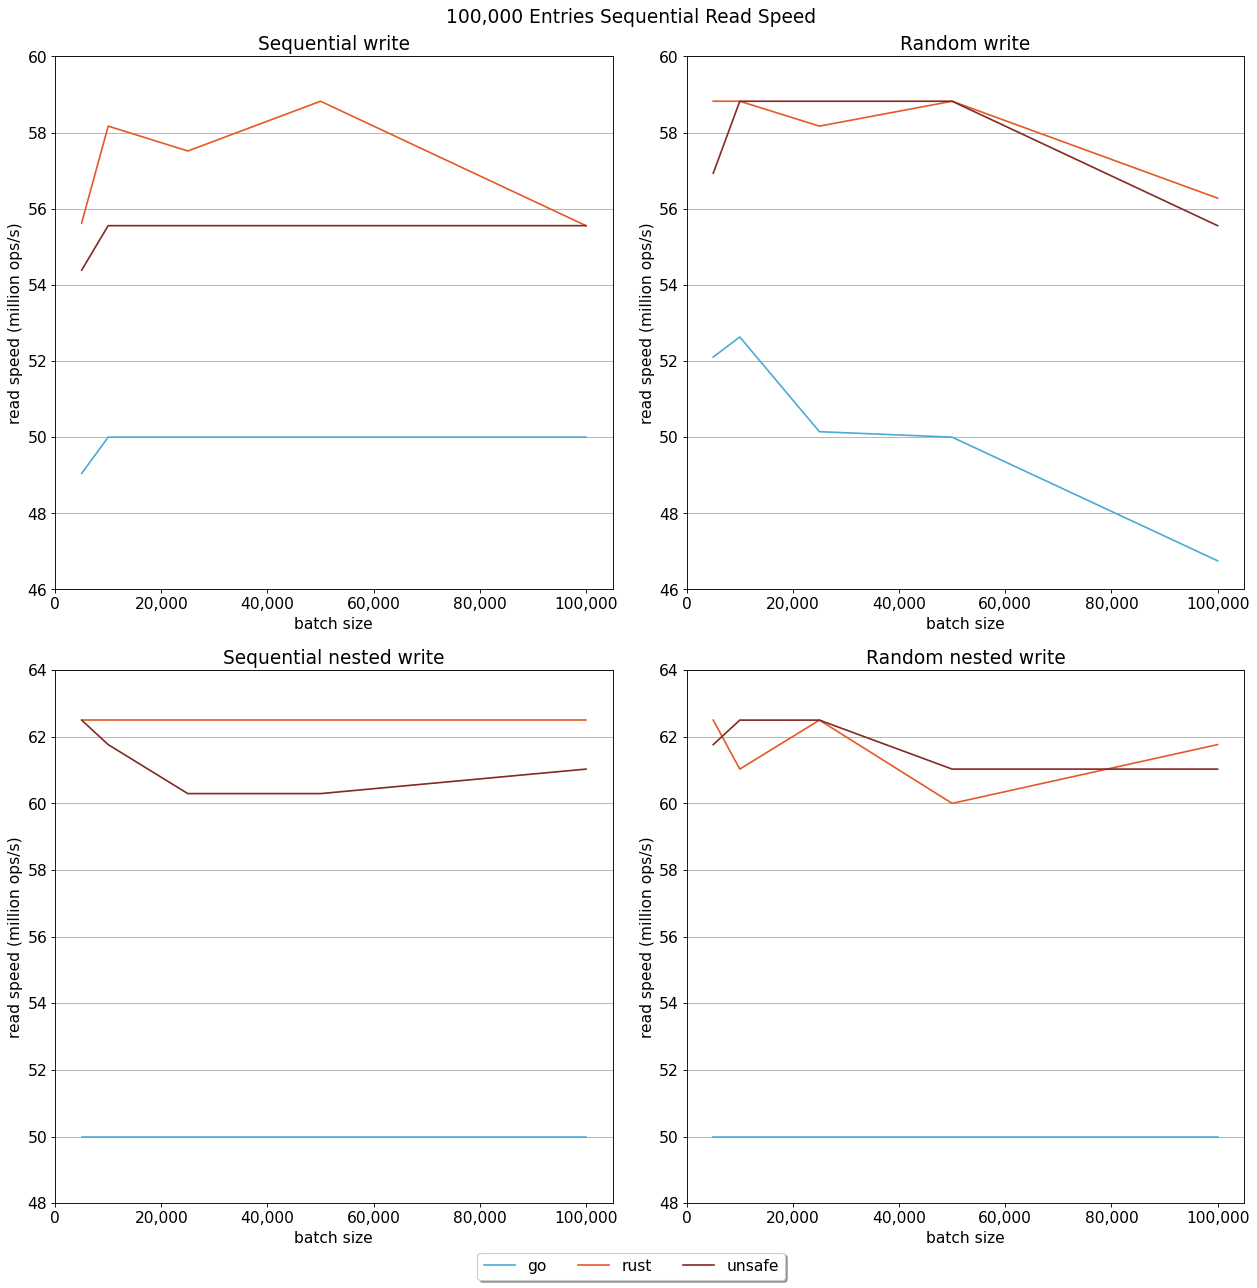

In [ ]:
groups=c100k.groupby(["write_alg","read_alg","runtime","batch"])["read_ops/s"].mean()
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('100,000 Entries Sequential Read Speed')
ax = fig.add_subplot(221)
grouped=groups['seq']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
plt.xlabel('batch size')
plt.title('Sequential write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([46000000,60000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(222)
grouped=groups['rnd']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Random write')
ax.grid(axis='y') 
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([46000000,60000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(223)
grouped=groups['seq-nest']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Sequential nested write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([48000000,64000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(224)
grouped=groups['rnd-nest']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
plt.xlabel('batch size')
plt.title('Random nested write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([48000000,64000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
fig.tight_layout()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines, labels,loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=True, shadow=True, ncols=3)
plt.show()

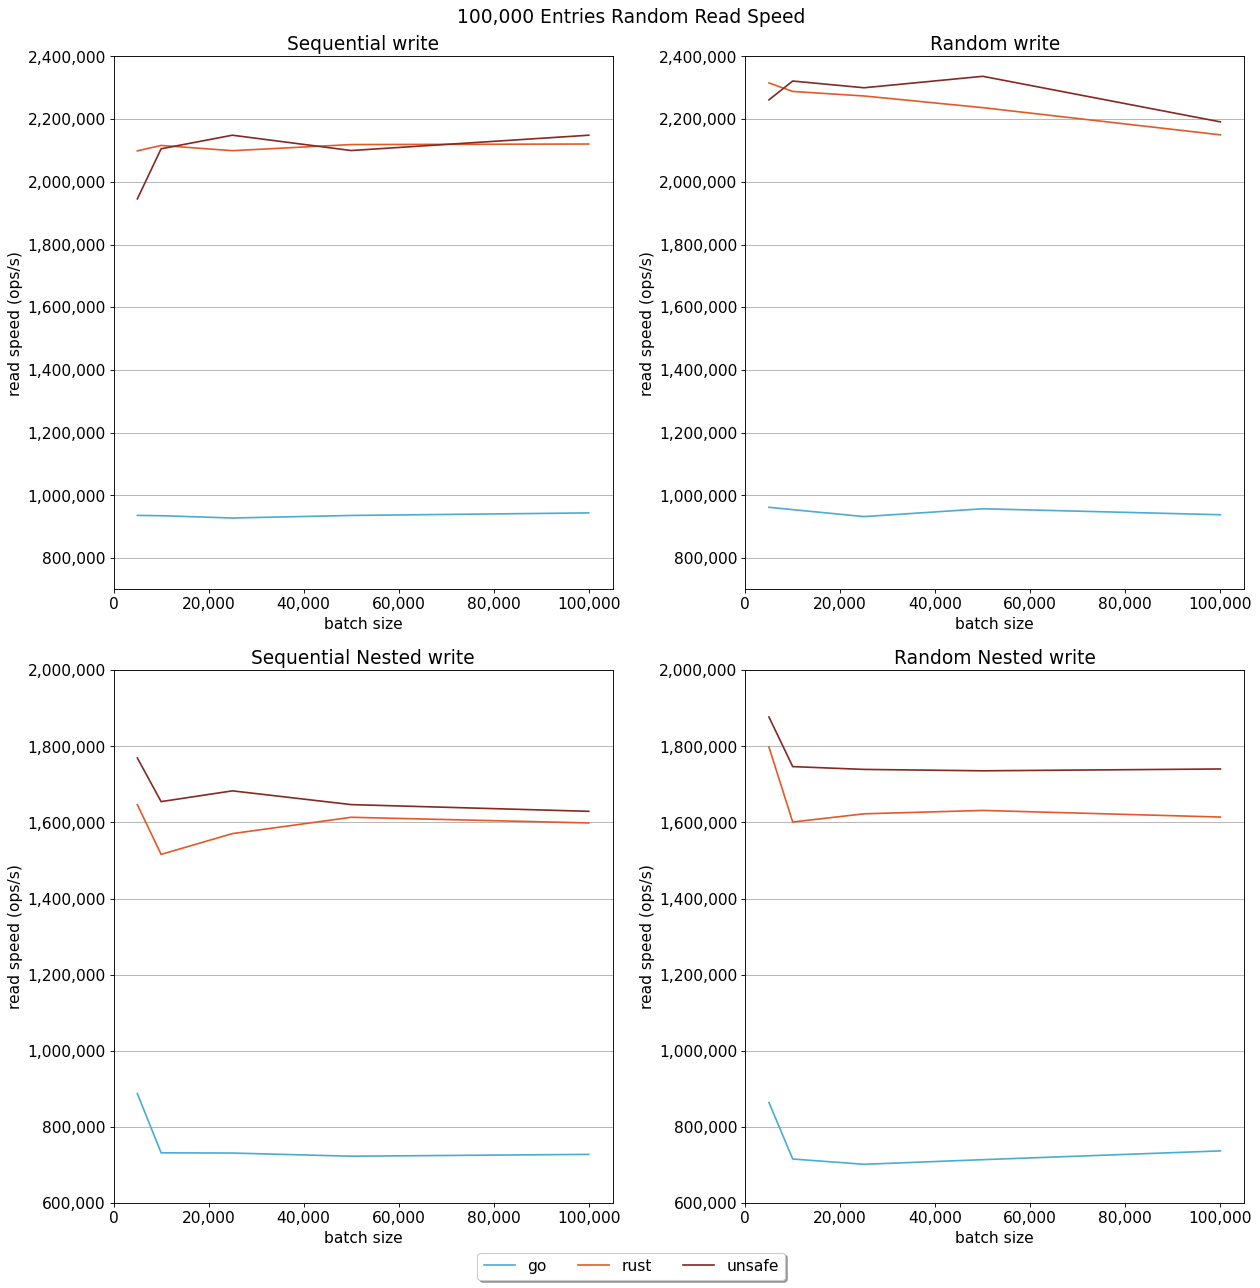

In [ ]:
groups=c100k.groupby(["write_alg","read_alg","runtime","batch"])["read_ops/s"].mean()
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('100,000 Entries Random Read Speed')
ax = fig.add_subplot(221)
grouped=groups['seq']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
plt.xlabel('batch size')
plt.title('Sequential write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([700000,2400000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(222)
grouped=groups['rnd']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
plt.xlabel('batch size')
plt.title('Random write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([700000,2400000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(223)
grouped=groups['seq-nest']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
plt.xlabel('batch size')
plt.title('Sequential Nested write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([600000,2000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(224)
grouped=groups['rnd-nest']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
plt.xlabel('batch size')
plt.title('Random Nested write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([600000,2000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
fig.tight_layout()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines, labels,loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=True, shadow=True, ncols=3)
plt.show()

In [ ]:
d = pd.DataFrame()

for write_alg in set(c100k['write_alg']):
    g=c100k[c100k['write_alg']==write_alg].groupby(["read_alg","runtime","batch"])["read_ops/s"].mean()
    dr = pd.DataFrame()
    for read_alg in set(c100k['read_alg']):
        r=g[read_alg]
        maxed=r['go'].idxmax()
        print(maxed)
        s = pd.Series([r['release'][maxed],r['go'][maxed]], index=['release','go'])
        dr[read_alg]=s
    print(write_alg)
    print(dr)



5000
10000
rnd
               rnd         seq
release  2315511.8  58823529.0
go        961959.6  52631578.0
5000
5000
rnd-nest
               rnd         seq
release  1798033.4  62499999.0
go        864319.8  50000000.0
5000
5000
seq-nest
               rnd         seq
release  1646707.0  62499999.0
go        887677.0  50000000.0
100000
10000
seq
               rnd         seq
release  2120699.8  58169934.2
go        944133.0  50000000.0


In [ ]:
c1m.groupby(["write_alg","runtime","batch"])["write_ops/s"].mean()

write_alg  runtime  batch 
rnd        go       5000       20378.9
                    10000      30846.0
                    25000      60968.1
                    50000      90335.8
                    100000     47903.7
                    250000      8914.6
           release  5000       22507.8
                    10000      33440.3
                    25000      65819.9
                    50000     115825.7
                    100000     96839.4
                    250000     20753.7
           unsafe   5000       22488.9
                    10000      33381.5
                    25000      65951.1
                    50000     117421.9
                    100000     96693.7
                    250000     20465.2
rnd-nest   go       5000       80057.1
                    10000      92540.0
                    25000      40812.7
                    50000      13917.6
                    100000      6067.0
                    250000      2284.4
           release  5000       80965.

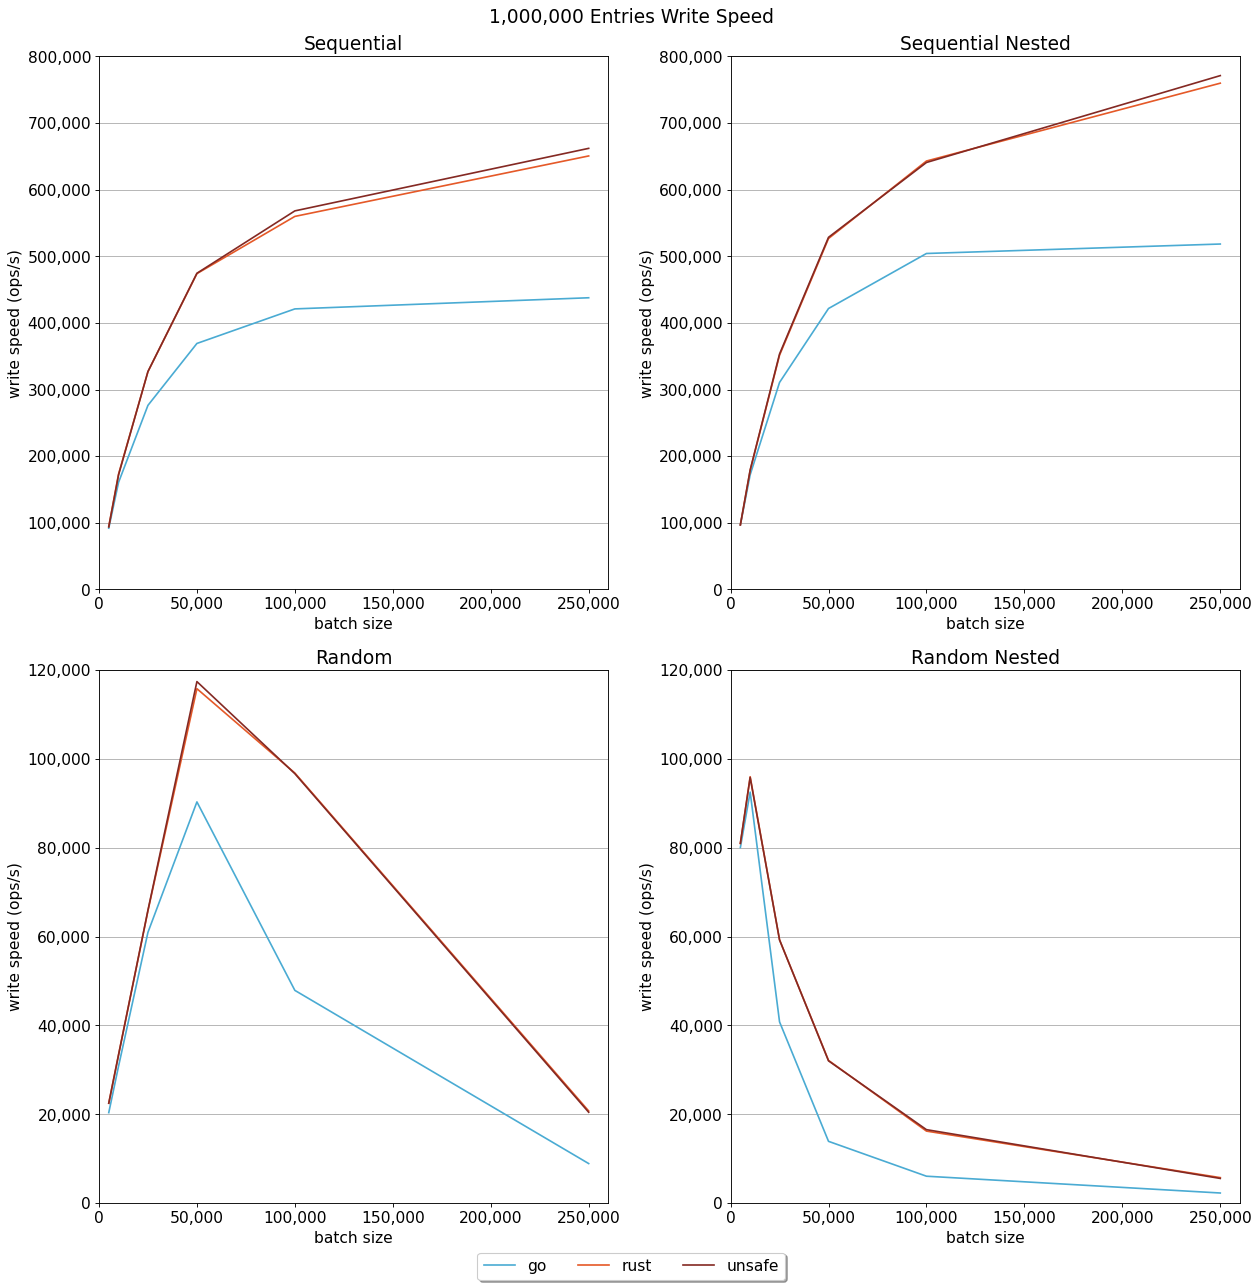

In [ ]:
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('1,000,000 Entries Write Speed')
ax = fig.add_subplot(221)
grouped=c1m[c1m['write_alg']=='seq'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Sequential')
ax.grid(axis='y')
ax.set_ylim([0,800000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(222)
grouped=c1m[c1m['write_alg']=='seq-nest'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Sequential Nested')
ax.grid(axis='y'); 
ax.set_ylim([0,800000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(223)
grouped=c1m[c1m['write_alg']=='rnd'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Random')
ax.grid(axis='y');
ax.set_ylim([0,120000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(224)
grouped=c1m[c1m['write_alg']=='rnd-nest'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Random Nested')
ax.grid(axis='y'); 
ax.set_ylim([0,120000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax.xaxis.set_major_formatter(ticks_comma)
fig.tight_layout()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines, labels,loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=True, shadow=True, ncols=3)
plt.show()

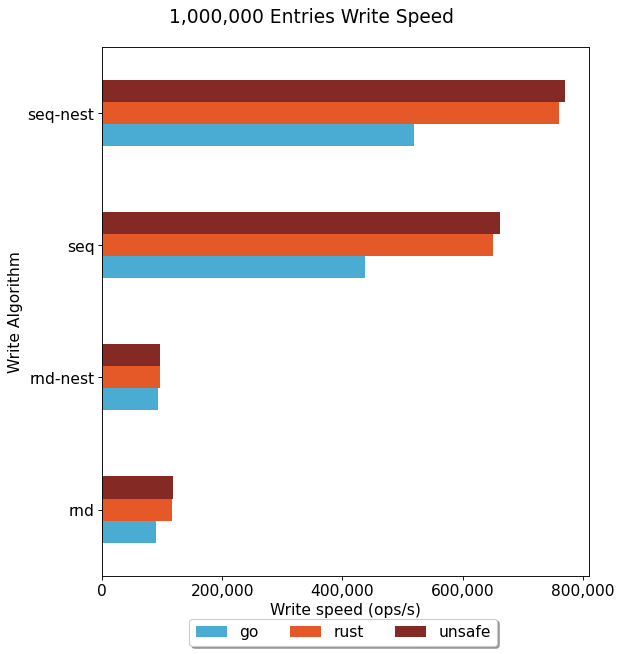

In [ ]:
alg = list()
batch_size = list()
release = list()
go = list()
unsafe = list()

for write_alg in set(c1m['write_alg']):
    g=c1m[c1m['write_alg']==write_alg].groupby(["runtime","batch"])["write_ops/s"].mean()
    maxed=g['go'].idxmax()
    alg.append(write_alg)
    batch_size.append(maxed)
    release.append(g['release'][maxed])
    go.append(g['go'][maxed])
    unsafe.append(g['unsafe'][maxed])

d = {
    'write_alg': alg,
    'go': go,
    'rust': release,
    'unsafe': unsafe
}

df=pd.DataFrame(data=d)
df.sort_values('write_alg',inplace=True)
fig = plt.figure(figsize=(8,8), dpi=80)
fig.suptitle('1,000,000 Entries Write Speed')
ax = fig.add_subplot(111)
df.plot.barh(x='write_alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlabel('Write speed (ops/s)')
ax.set_xticks([0,200000,400000,600000,800000])
ax.set_ylabel('Write Algorithm')
ax.get_legend().remove()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.55, -0.03), fancybox=True, shadow=True, ncols=3)
fig.tight_layout()
plt.show()

In [ ]:
d = pd.DataFrame()

for write_alg in set(c1m['write_alg']):
    g=c1m[c1m['write_alg']==write_alg].groupby(["runtime","batch"])["write_ops/s"].mean()
    dr = pd.DataFrame()
    maxed=g['go'].idxmax()
    s = pd.Series([g['release'][maxed],g['go'][maxed]], index=['release','go'])
    dr[write_alg]=s   
    print(write_alg)
    print(s['release']/s['go'])
    print(dr)
    print('\n')

rnd
1.2821683097952306
              rnd
release  115825.7
go        90335.8


rnd-nest
1.0374670412794467
         rnd-nest
release   96007.2
go        92540.0


seq-nest
1.465641416545602
         seq-nest
release  759870.0
go       518455.6


seq
1.486182363383697
              seq
release  650654.8
go       437802.8




In [ ]:
c1m.groupby(["write_alg","read_alg","runtime","batch"])["read_ops/s"].mean()

write_alg  read_alg  runtime  batch 
rnd        rnd       go       5000        697554.0
                              10000       677396.8
                              25000       731906.0
                              50000       734407.6
                              100000      733167.4
                              250000      717389.8
                     release  5000       1221956.6
                              10000      1223721.2
                              25000      1272322.6
                              50000      1251467.8
                              100000     1270015.6
                              250000     1276534.8
                     unsafe   5000       1235559.2
                              10000      1237343.6
                              25000      1273202.8
                              50000      1268599.8
                              100000     1284061.2
                              250000     1297026.8
           seq       go       5000      49523

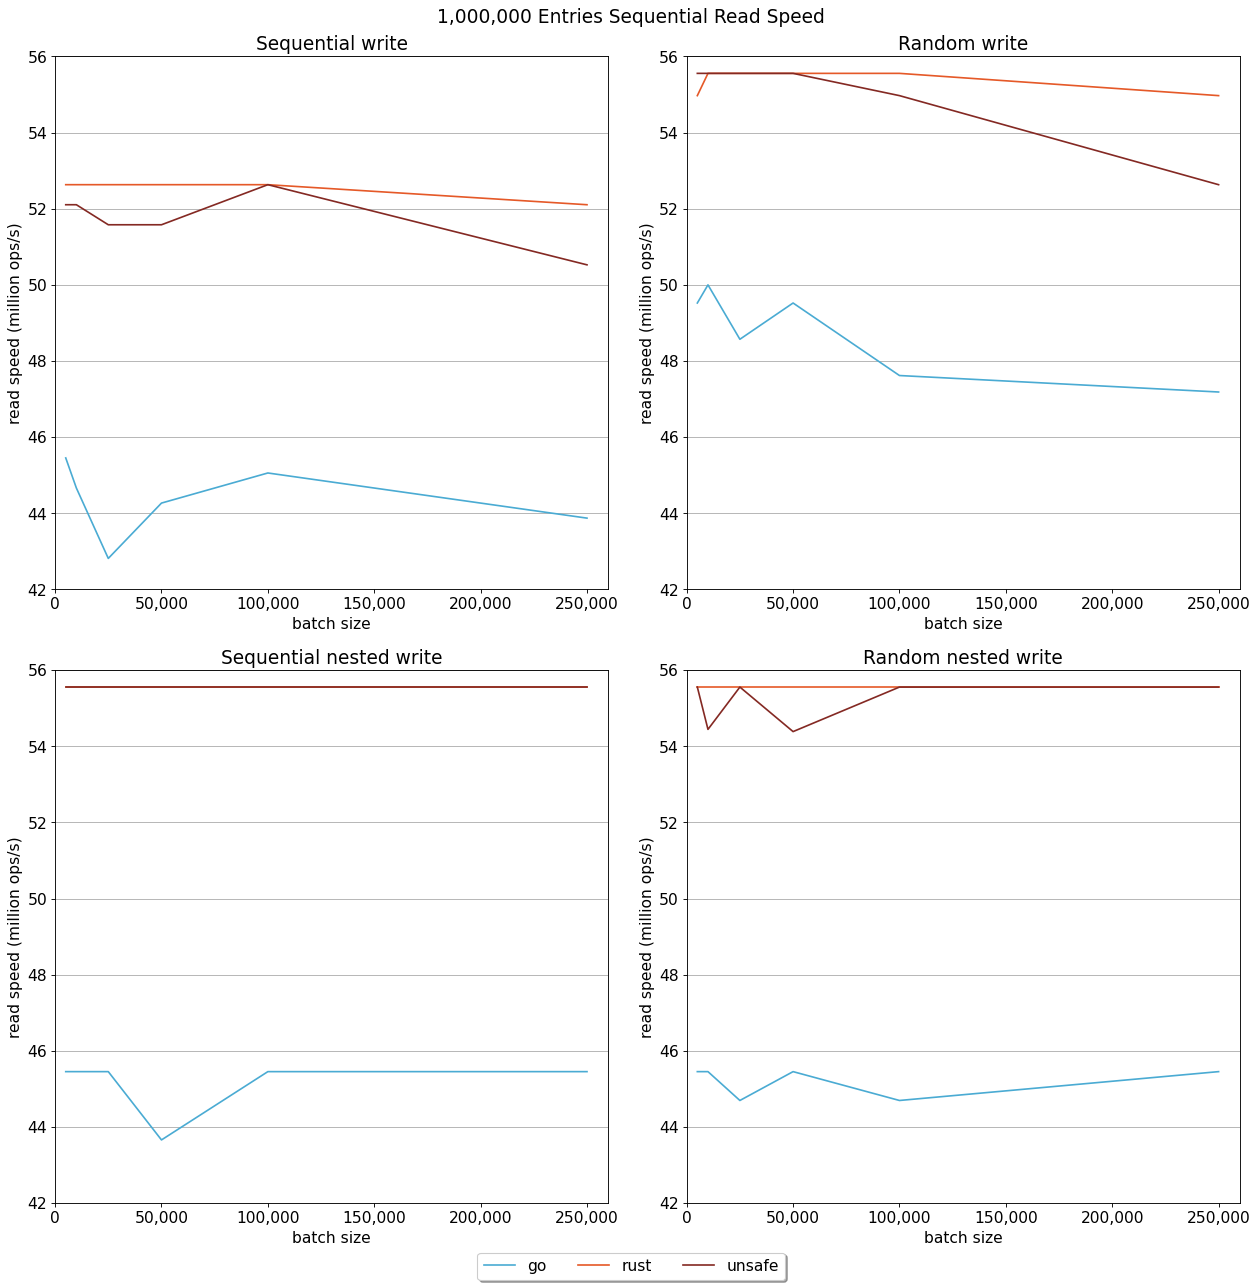

In [ ]:
groups=c1m.groupby(["write_alg","read_alg","runtime","batch"])["read_ops/s"].mean()
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('1,000,000 Entries Sequential Read Speed')
ax = fig.add_subplot(221)
grouped=groups['seq']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Sequential write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([42000000,56000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(222)
grouped=groups['rnd']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Random write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([42000000,56000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(223)
grouped=groups['seq-nest']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
plt.xlabel('batch size')
plt.title('Sequential nested write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([42000000,56000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(224)
grouped=groups['rnd-nest']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Random nested write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([42000000,56000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
fig.tight_layout()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines, labels,loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=True, shadow=True, ncols=3)
plt.show()

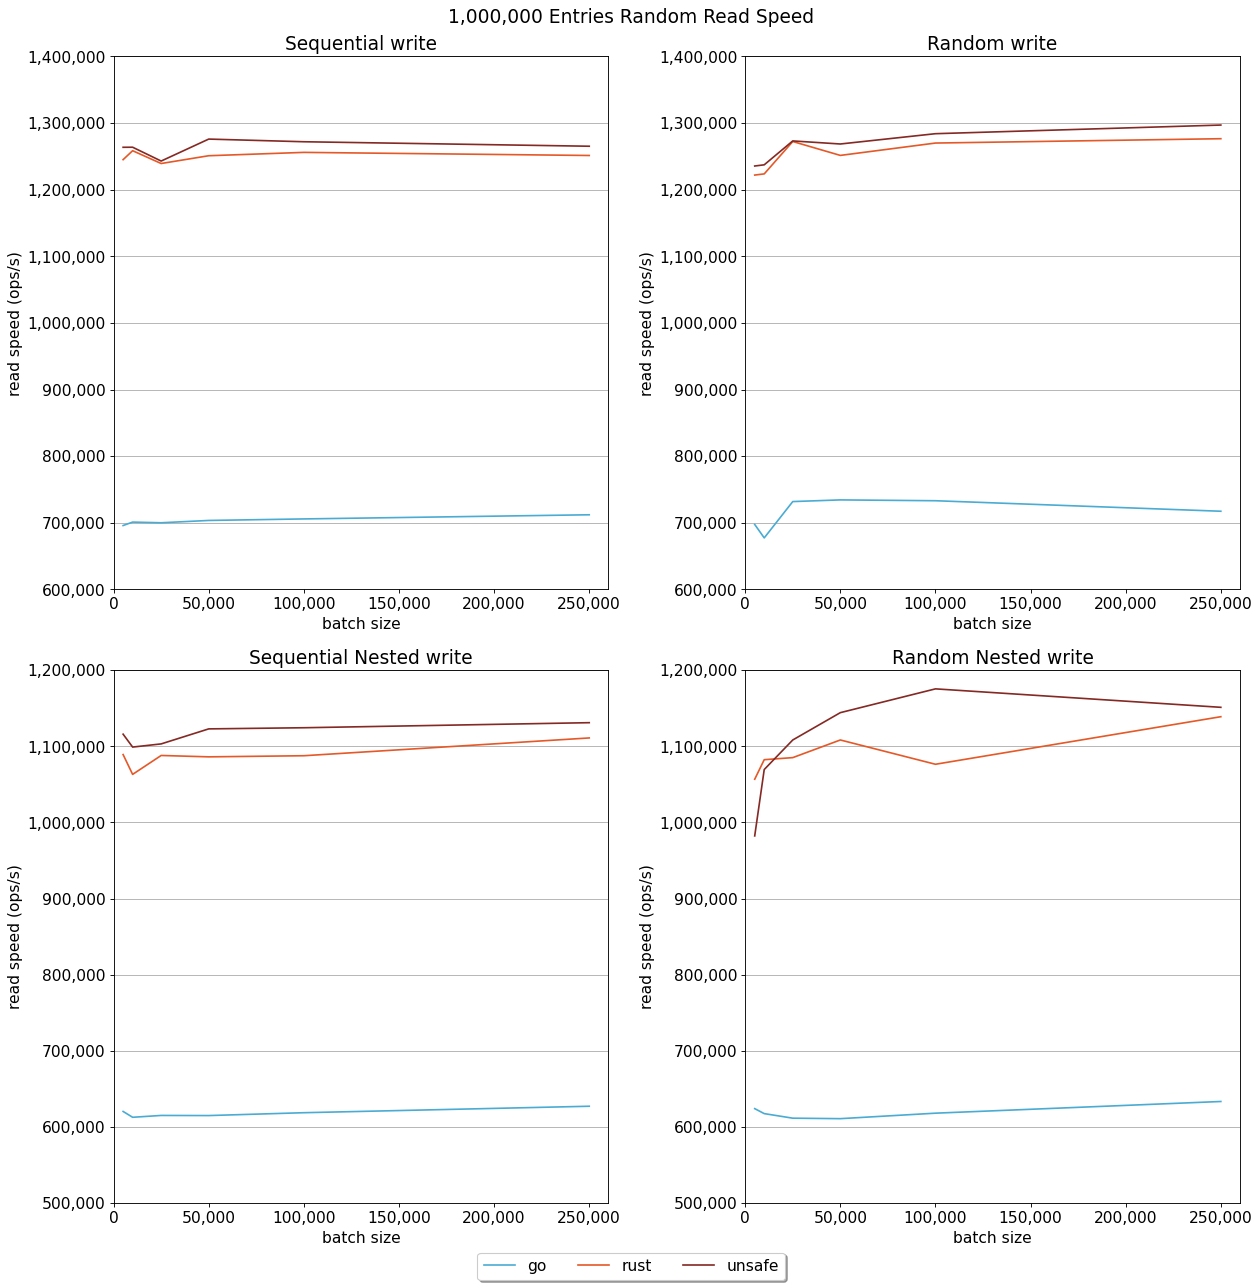

In [ ]:
groups=c1m.groupby(["write_alg","read_alg","runtime","batch"])["read_ops/s"].mean()
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('1,000,000 Entries Random Read Speed')
ax = fig.add_subplot(221)
grouped=groups['seq']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Sequential write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([600000,1400000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(222)
grouped=groups['rnd']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Random write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([600000,1400000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(223)
grouped=groups['seq-nest']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Sequential Nested write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([500000,1200000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(224)
grouped=groups['rnd-nest']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Random Nested write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([500000,1200000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
fig.tight_layout()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines, labels,loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=True, shadow=True, ncols=3)
plt.show()

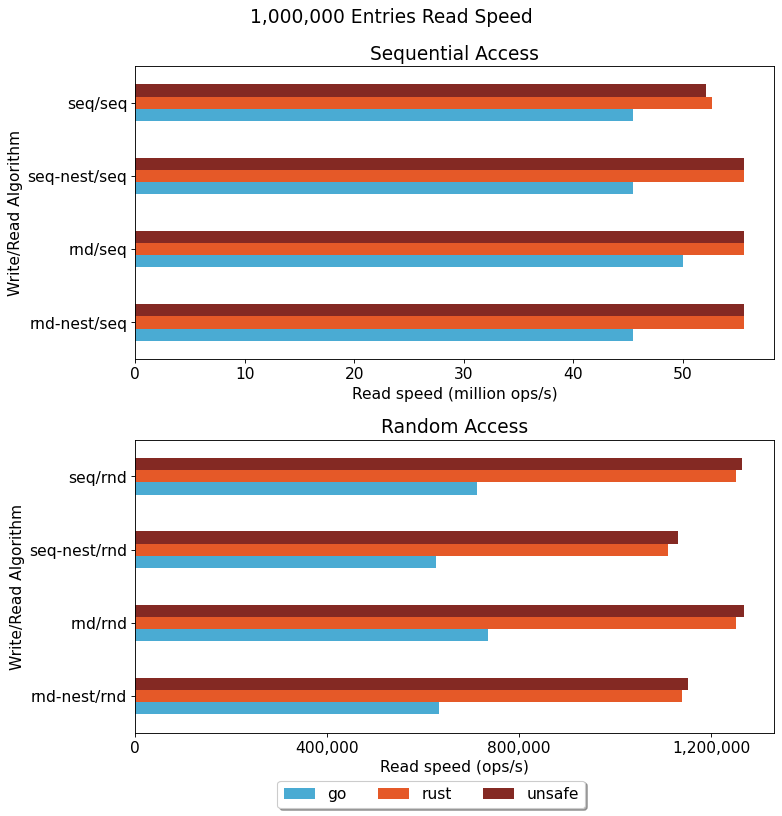

In [ ]:
alg = list()
batch_size = list()
release = list()
go = list()
unsafe = list()

for write_alg in set(c1m['write_alg']):
    for read_alg in set(c1m['read_alg']):
        g=c1m[c1m['write_alg']==write_alg].groupby(["read_alg","runtime","batch"])["read_ops/s"].mean()
        r = maxed=g[read_alg]
        maxed=r['go'].idxmax()
        alg.append(write_alg + '/' + read_alg)
        batch_size.append(maxed)
        release.append(r['release'][maxed])
        go.append(r['go'][maxed])
        unsafe.append(r['unsafe'][maxed])

d = {
    'alg': alg,
    'go': go,
    'rust': release,
    'unsafe': unsafe
}
pd_rnd=pd.DataFrame(data=d)
pd_rnd.sort_values('alg',inplace=True)
fig = plt.figure(figsize=(10,10), dpi=80)
fig.suptitle('1,000,000 Entries Read Speed')
ax = fig.add_subplot(212)
pd_rnd[pd_rnd['alg'].str.endswith('rnd')].plot(kind='barh',x='alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_title('Random Access')
ax.set_xlabel('Read speed (ops/s)')
ax.set_xticks([0,400000,800000,1200000])
ax.set_ylabel('Write/Read Algorithm')
ax.get_legend().remove()
ax = fig.add_subplot(211)
pd_rnd[pd_rnd['alg'].str.endswith('seq')].plot(kind='barh',x='alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_million)
ax.set_title('Sequential Access')
ax.set_xlabel('Read speed (million ops/s)')
ax.set_ylabel('Write/Read Algorithm')
ax.get_legend().remove()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.55, -0.03), fancybox=True, shadow=True, ncols=3)
fig.tight_layout()
plt.show()

In [ ]:
d = pd.DataFrame()

for write_alg in set(c1m['write_alg']):
    g=c1m[c1m['write_alg']==write_alg].groupby(["read_alg","runtime","batch"])["read_ops/s"].mean()
    dr = pd.DataFrame()
    for read_alg in set(c1m['read_alg']):
        r=g[read_alg]
        maxed=r['go'].idxmax()
        s = pd.Series([r['release'][maxed],r['go'][maxed]], index=['release','go'])
        print(s['release']/s['go'])
        dr[read_alg]=s
    print(write_alg)
    print(dr)
    print('\n')

1.7040507206080113
1.1111111
rnd
               rnd         seq
release  1251467.8  55555555.0
go        734407.6  50000000.0


1.7976881258760686
1.2222222222222223
rnd-nest
               rnd         seq
release  1138857.0  55555555.0
go        633512.0  45454545.0


1.7710882978614864
1.2222222222222223
seq-nest
               rnd         seq
release  1110962.6  55555555.0
go        627276.8  45454545.0


1.7573030028207353
1.1578947275789473
seq
               rnd         seq
release  1251347.0  52631578.0
go        712083.8  45454545.0


